# Multiagent systems - TSP Problem

In [1]:
import tsplib95
from random import randrange, random, shuffle
from bisect import bisect
import pandas as pd
import matplotlib.pyplot as plt
import pixiedust

Pixiedust database opened successfully


## Load TSP Problem

In [2]:
# Data Source : http://www.math.uwaterloo.ca/tsp/world/countries.html
TSP_FILE = 'uy734.tsp' # 🇺🇾 Uruguay
TSP_FILE = 'wi29.tsp' # 🇪🇭 Western Sahara

In [3]:
# LOAD TSP FILE
PROBLEM = tsplib95.load(TSP_FILE)
print(type(PROBLEM))

<class 'tsplib95.models.StandardProblem'>


In [4]:
PROBLEM.type

'TSP'

In [5]:
N = len(list(PROBLEM.get_nodes())) # N is total cities
print("%s Cities"%N)

29 Cities


In [6]:
# Example city coordinates
PROBLEM.node_coords[3]

[21300.0, 13016.6667]

In [7]:
# Distance between first and last cities
edge = {'start':1,'end':N}
PROBLEM.get_weight(**edge)

7799

## Basic Ant

In [8]:
class Ant:
    tour = None
    tsp = PROBLEM
    _tour_weight_cache = {'n_cities':0, 'weight': 0} # code optimization
    
    def __init__(self, city_i=0):
        self.tour = []
        if city_i>0:
            self.visit(city_i)
    
    @property
    def current_city(self):
        return self.tour[-1]

    @property
    def tour_weight(self):
        if len(self.tour) != self._tour_weight_cache['n_cities']:
            self._tour_weight_cache['weight'] = self.tsp.trace_tours([self.tour])[0]
        return self._tour_weight_cache['weight']
    
    def visit(self, i:int):
        if i in self.tour:
            raise Exception("The city i: %s is already visited. Imposible to visit again"%i)
        if i < 1 or i > N:
            raise Exception("The city i (%s) is out of range: -> [1, %s]"%(i, N))
        self.tour.append(i)
    
    def distance_to(self, city_j:int):
        return self.tsp.get_weight(self.current_city, city_j)
    
    def _not_visited_cities(self):
        return [i for i in range(1,N+1) if i not in self.tour]
    
    def _raw_probability(self, city_j:int, pheromones_matrix):
        ## ASSUMPTION: We consider the edge has two ways. Phromones to go and to go back. In other words. I->J != J->I
        # careful, we must substract one from the cities index
        return pheromones_matrix[self.current_city-1][city_j-1]**ALPHA * (1/self.distance_to(city_j))**BETA
    
    def normalized_probabilities(self, pheromones_matrix):
        """ Returns a tuple
            First element: List of neighbors, cities not visited
            Second element: List of probabilities calculated with the formular of tau_ij^A* h_ij^B
        """
        neighbors = self._not_visited_cities()
        neighbors_pheromone_list = [self._raw_probability(neighbor_j, pheromones_matrix) for neighbor_j in neighbors]
        total = sum(neighbors_pheromone_list)
        return neighbors, [pheromone_ij/total for idx, pheromone_ij in enumerate(neighbors_pheromone_list)]
        
    def pick_next_city(self, cities, probabilities):
        roulette_x = random()
        idx = 0
        roulette_sum = 0
        for p in probabilities:
            roulette_sum += p
            if roulette_sum >= roulette_x  :
                return cities[idx]
    
    def finished_tour(self):
        return len(self.tour) == N

    def plot_hot_map(self):
        df = pd.DataFrame([[0 for j in N] for i in N])
        for posi_i in range(1, len(ant.tour)):
            i = ant.tour[posi_i-1]-1
            j = ant.tour[posi_i]-1
            pheromones_to_add[i][j] += tau_delta
            
        plt.imshow(df, cmap='hot', interpolation='nearest')
        plt.show()

In [9]:
a = Ant(1)
print(a.tour)
a.visit(29)
print(a.tour)
print("Total weight of this ant tour is: %s"%a.tour_weight)

[1]
[1, 29]
Total weight of this ant tour is: 15598


In [22]:
def plot_pheromones(df, title):
    print(title)
    plt.imshow(df, cmap='hot', interpolation='nearest')
    plt.show()

## BASE LINE

In [10]:
# Solution joining all the cities in sequence
ant = Ant(1)
for i in range(2,N+1):
    ant.visit(i)
print(ant.tour)
print(ant.tour_weight)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
52284


In [11]:
# Random Solution
ant = Ant(1)
random_cities = list(range(2,N+1))
shuffle(random_cities)
for i in random_cities:
    ant.visit(i)
print(ant.tour)
print(ant.tour_weight)

[1, 3, 21, 17, 11, 24, 4, 12, 5, 16, 8, 20, 22, 2, 25, 15, 13, 18, 23, 7, 19, 26, 27, 29, 28, 10, 14, 9, 6]
110078


In [12]:
# Solution using the heuristic
ant = Ant(1)
while not ant.finished_tour():
    neighbors = ant._not_visited_cities()
    distances = []
    for city_j in range(1, len(neighbors)+1):
        distances.append(ant.distance_to(city_j))
    pos_min_distance = distances.index(min(distances))
    next_closest_city = neighbors[pos_min_distance]
    ant.visit(next_closest_city)
print(ant.tour)
print(ant.tour_weight)

[1, 2, 4, 7, 11, 16, 22, 29, 28, 27, 23, 26, 25, 24, 20, 21, 19, 18, 17, 14, 15, 13, 12, 8, 9, 6, 5, 10, 3]
56645


## ANT SYSTEM

Step 1 from 100.


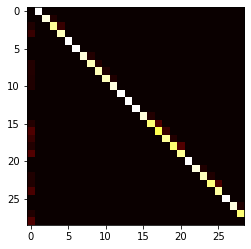

Step 11 from 100.


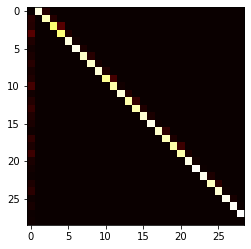

Step 21 from 100.


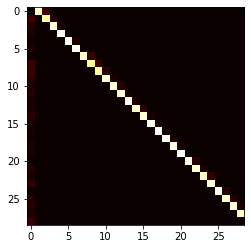

Step 31 from 100.


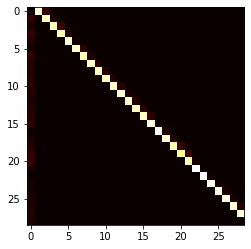

Step 41 from 100.


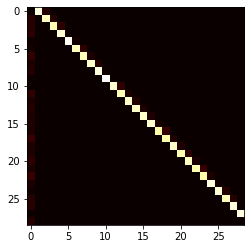

Step 51 from 100.


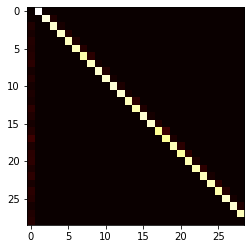

Step 61 from 100.


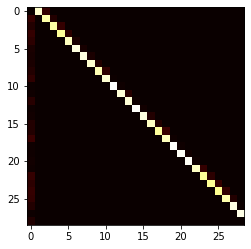

Step 71 from 100.


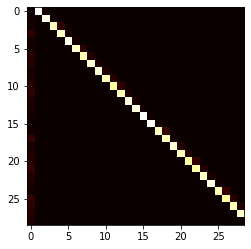

Step 81 from 100.


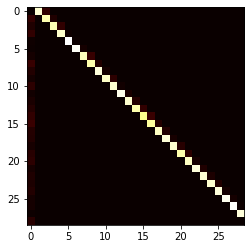

Step 91 from 100.


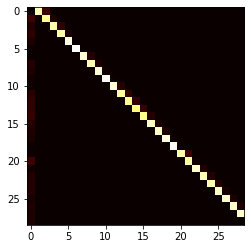

Step 100 from 100.


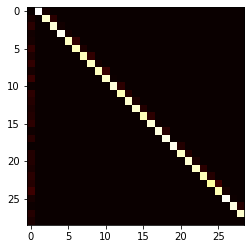

In [29]:
M_ANTS = N # Number of ants ~ to number of nodes (N)
ALPHA = 1 # History coefficietn ~ 1
BETA = 2.5 # 0,1,2,3,4,5,6 # Heuristic Coefficient [2,5]
RO = 0.5 # Evaporation rate # It's like cooling. A high value is similar to very decrease the temparature drastically and get stucked in a local optimum
Q = 1 # Pheromone change factor
TAU_INITIAL = 1/70000 # Initial pheromone ~ 1/RO*C^nn ; C^nn is the length of the tour generated by the nearest neighbor heuristic
STEPS = 100

# INIT MATRIX for each CITY IJ with TAU INITIAL (t_0)
_pheromones_row = [TAU_INITIAL for i in range(N)]
pheromones_matrix = [_pheromones_row for j in range(N)]

history_list = []

for step in range(STEPS):
    ants_list = []
    for ant_i in range(M_ANTS):
        # pick a starting point
        first_random_city = randrange(N)+1
        ant = Ant(first_random_city)
        ants_list.append(ant)
        while not ant.finished_tour():
            # calculate probability P_j for all unvisited neightbors J
                # ANT SYSTEM (AS): Probability of each edge in the neighborhood
                # p_ij_k = (t_ij^a * (1/d_ij)^b ) / SUM(all feasible g edges) # It's like edge normalized
            neighbors, probabilities = ant.normalized_probabilities(pheromones_matrix) # sum(probabilities) == 1
            # pick the next node using the probabilities
            next_city = ant.pick_next_city(neighbors, probabilities)
            ant.visit(next_city)
    history_list.append(ants_list.copy()) # save results
    # update pheromone values based upon the quality of each solution
        # ANT SYSTEM (AS): All ants contribute updating the pheromone as follows
        # TAU_I_J = (1-RO)*TAU_I_J + SUM(Q/(Lk or 0)) # Attention! In TSP Lk will be always the same == N Total cities
                                           # Probably in TSP the length means the distance
    pheromones_to_add = [[0 for i in range(N)] for j in range(N)]
    for ant in ants_list:
        tau_delta = Q/ant.tour_weight
        for tour_i in range(1, len(ant.tour)):
            i = ant.tour[tour_i-1]-1 # city
            j = ant.tour[tour_i]-1 # next city
            pheromones_to_add[i][j] += tau_delta
    # update fermonones
    df = pd.DataFrame(pheromones_matrix)*(1-RO)+pd.DataFrame(pheromones_to_add)
    pheromones_matrix = df.values
    # PLOT every 10th of steps
    if step % int(STEPS/10) == 0:
        plot_pheromones(df, title="Step %s from %s."%(step+1,STEPS))
# Plot last result
plot_pheromones(df, title="Step %s from %s."%(step+1,STEPS))
        

In [30]:
tours_weight_list = [a.tour_weight for a in ants_list]
print(tours_weight_list)

[56061, 51347, 51036, 56061, 52284, 51946, 52299, 52758, 52312, 52758, 52515, 49265, 52277, 49265, 56265, 52366, 49265, 56265, 52322, 50670, 52515, 51263, 52312, 53179, 50670, 56265, 52312, 52299, 53179]


In [31]:
pos_min = tours_weight_list.index(min(tours_weight_list))
print("Min weigth: %s"%tours_weight_list[pos_min])
best_tour = ants_list[pos_min].tour
print("Best Tour: %s"%best_tour)

Min weigth: 49265
Tour: [6, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


## Parameters

In [16]:
M_ANTS = 5 # Number of ants ~ to number of nodes (N)
ALPHA = 1 # History coefficietn ~ 1
BETA = 2 # 0,1,3,4,5,6 # Heuristic Coefficient [2,5]
RO = 0.02 # Eaporation rate # It's like cooling. A high value is similar to very decrease the temparature drastically and get stucked in a local optimum
Q = 0.5 # Pheromone change factor
TAU_INITIAL = 0.5 # Initial pheromone ~ 1/RO*C^nn ; C^nn is the length of the tour generated by the nearest neighbor heuristic

In [17]:
# FOR MMAS
CHS = 99999999999 # TODO: Make the heuristic picking the shortest path at each step
TAU_MAX = 1/(RO*CHS) # 1/RO*C^hs ; C^hs is the length of the best tour found so far
TAU_MIN = TAU_MAX*(1-0.05**(1/N))